<a href="https://colab.research.google.com/github/ErSangram/capstone_03_Zomato_Restaurant_Clustering_And_Analysis/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering & Sentiment Analysis

#####**Project Type**- Unsupervised Machine Learning
##### **Contribution**    - Individual
##### **Team Member 1 -** Sangram Naik

# **Project Summary -**
Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

The Zomato Restaurant Clustering and Sentiment Analysis Project is a machine learning project that involves clustering restaurants based on their features and performing sentiment analysis on customer reviews. The project uses unsupervised learning techniques to group similar restaurants and identifies patterns and similarities among them. Additionally, sentiment analysis is performed on the reviews of each restaurant to classify them as positive, negative, or neutral. The insights gained from this project can be useful for restaurant owners to understand customer preferences and improve their services accordingly.

# **GitHub Link -**

# **Problem Statement**

The restaurant industry is highly competitive and dynamic, with new restaurants constantly entering the market. Restaurant owners face the challenge of understanding customer preferences and meeting their expectations to stay relevant in the market. In this context, there is a need for a data-driven approach that can help restaurant owners gain insights into customer preferences and improve their services accordingly. The Zomato Restaurant Clustering and Sentiment Analysis Project aims to address this problem by leveraging machine learning techniques to cluster restaurants based on their features and perform sentiment analysis on customer reviews to identify areas of improvement.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [294]:
# Import Libraries
import pandas as pd
import numpy as np

# For Visualization 
import seaborn as sns
sns.set(color_codes=True) 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

#importing contraction
!pip install contractions
!pip install gensim
import gensim
from gensim import corpora

#importing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Dataset Loading

In [295]:
# Loading Zomato Restaurant names and Metadata Dataset 
restro_df = pd.read_csv('/content/drive/MyDrive/Alma_projects/clustering_project_data/Zomato Restaurant names and Metadata.csv')
#Loading Zomato Restaurant reviews Dataset
reviews_df = pd.read_csv('/content/drive/MyDrive/Alma_projects/clustering_project_data/Zomato Restaurant reviews.csv')

### Dataset First View

In [296]:
restro_df.sample(5)

,Name,Links,Cost,Collections,Cuisines,Timings
10,Sardarji's Chaats & More,https://www.zomato.com/hyderabad/sardarjis-cha...,400,"Street Food, Veggie Friendly, Pocket Friendly","Street Food, North Indian, Fast Food","12 Noon to 3:30 PM, 7 PM to 10:30 PM"
70,Urban Asia - Kitchen & Bar,https://www.zomato.com/hyderabad/urban-asia-ki...,"1,100",NaN,"Asian, Thai, Chinese, Sushi, Momos","12 Noon to 3 PM, 7 PM to 11 PM"
54,Asian Meal Box,https://www.zomato.com/hyderabad/asian-meal-bo...,200,NaN,Asian,"12noon to 12midnight (Mon, Tue, Wed, Thu, Sun)..."
12,Absolute Sizzlers,https://www.zomato.com/hyderabad/absolute-sizz...,750,Great Buffets,"Continental, American, Chinese",11:30 AM to 1 AM
33,Club Rogue,https://www.zomato.com/hyderabad/club-rogue-ga...,900,NaN,"North Indian, Fast Food",11 AM to 12 Midnight


In [297]:
reviews_df.sample(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
483,Over The Moon Brew Company,Japneet Singh,"Do ask for Makhan if you visit, great service ...",4,"5 Reviews , 195 Followers",4/28/2019 15:03,0
850,Hyper Local,Anshuman Sahu,Menu needs a major overhaul. Not for a large g...,3,"6 Reviews , 7 Followers",4/11/2019 21:28,0
6992,The Indi Grill,Nikhil Choudary,The food and the ambience is good special than...,5,1 Review,4/17/2019 21:31,0
5420,Asian Meal Box,D.S,"Waste of money , tried there Vegetable noodle ...",1,"195 Reviews , 2079 Followers",3/3/2019 1:46,1
9175,Cascade - Radisson Hyderabad Hitec City,Rohan Kichlu,Good food and great service. They are consiste...,4.5,"66 Reviews , 939 Followers",3/4/2018 12:20,0


### Dataset Rows & Columns count

In [298]:
# Dataset Rows & Columns count
print(f'A Restaurant Dataset contain {restro_df.shape[0]} rows and {restro_df.shape[1]} Columns')
print(f'A reviews Dataset contain {reviews_df.shape[0]} rows and {reviews_df.shape[1]} Columns')

A Restaurant Dataset contain 105 rows and 6 Columns
A reviews Dataset contain 10000 rows and 7 Columns


### Dataset Information

In [299]:
# Restaurant Dataset information
restro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [300]:
# reviews Dataset information
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [301]:
# Restaurant Dataset Duplicate Value Count
len(restro_df[restro_df.duplicated()])

0

In [302]:
# reviews Dataset Duplicate Value Count
len(reviews_df[reviews_df.duplicated()])

36

#### Missing Values/Null Values

In [303]:
# Missing Values/Null Values Count from Restaurant Dataset
null_df = restro_df.isna().sum().sort_values(ascending=False).reset_index().rename(columns={'index':'Columns',0:'Null_values'})   
null_df

,Columns,Null_values
0,Collections,54
1,Timings,1
2,Name,0
3,Links,0
4,Cost,0
5,Cuisines,0


In [304]:
# Missing Values/Null Values Count from reviews Dataset
null_df = reviews_df.isna().sum().sort_values(ascending=False).reset_index().rename(columns={'index':'Columns',0:'Null_values'})
null_df

,Columns,Null_values
0,Review,45
1,Reviewer,38
2,Rating,38
3,Metadata,38
4,Time,38
5,Restaurant,0
6,Pictures,0


### Dataset Observations.

We have two datasets in our project - "Zomato Restaurant names and Metadata.csv" and "Zomato Restaurant reviews.csv".

The "Zomato Restaurant names and Metadata.csv" dataset contains six columns: "Name", "Links", "Cost", "Collections", "Cuisines", and "Timings". There are 105 non-null values in each column except for "Collections" and "Timings", which have 54 and 1 non-null values, respectively.

The "Zomato Restaurant reviews.csv" dataset contains seven columns: "Restaurant", "Reviewer", "Review", "Rating", "Metadata", "Time", and "Pictures". There are 10,000 non-null values in the "Restaurant" and "Pictures" columns, while the "Reviewer", "Review", "Rating", "Metadata", and "Time" columns have 9962 non-null values.

Overall, these datasets contain valuable information about restaurants such as their names, cuisines, cost, and customer reviews. The information can be used to perform various analysis tasks such as sentiment analysis and clustering to gain insights into customer preferences and improve restaurant services.

## ***2. Understanding Your Variables***

In [305]:
# Restaurant Dataset Columns
restro_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [306]:
# reviews dataset columns
reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [307]:
# Dataset Describe using description of the data with statistical turms.
restro_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [308]:
reviews_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


### Variables Description 

Variable Description of Restaurant Data

*  **Name** = Name of Restaurants
*  **Links** = URL Links of Restaurants 
*  **Cost** = Per person estimated cost of dining
*  **Collections** = Tagging of Restaurants with respect to Zomato categories
*  **Cuisines** = Cuisines served by restaurants 
*  **Timings** = Restaurant timings

Variable Description of Review Dataset

*  **Reviewer** = Name of the reviewer 
*  **review** = Review text 
*  **Rating** = Rating provided 
*  **MetaData** = Reviewer metadats-No of reviews and followers 
*  **Time** = Date and Time of Review 
*  **Pictures** = Number of pictures posted with review

### Check Unique Values for each variable.

In [309]:
# Check Unique Values for each variable.
a,b = [],[]
for i in list(restro_df.columns):
    a.append(i)
    b.append(restro_df[i].nunique()) 
    
lis = list(zip(a,b))
df = pd.DataFrame(lis, columns = ['column_names','unique values'])
df

,column_names,unique values
0,Name,105
1,Links,105
2,Cost,29
3,Collections,42
4,Cuisines,92
5,Timings,77


In [310]:
# Check Unique Values for each variable.
a,b = [],[]
for i in list(reviews_df.columns):
    a.append(i)
    b.append(reviews_df[i].nunique()) 
    
lis = list(zip(a,b))
df = pd.DataFrame(lis, columns = ['column_names','unique values'])
df

,column_names,unique values
0,Restaurant,100
1,Reviewer,7446
2,Review,9364
3,Rating,10
4,Metadata,2477
5,Time,9782
6,Pictures,36


## 3. ***Data Wrangling***

In [311]:
# Need to make data clean frist delete duplicate values from the dataset
reviews_df.drop_duplicates(inplace=True)

In [312]:
restro_df['Cost']

0        800
1        800
2      1,300
3        800
4      1,200
       ...  
100      600
101      200
102      500
103      250
104    1,700
Name: Cost, Length: 105, dtype: object

In [313]:
# changing the data type of the cost varible
restro_df['Cost'] = restro_df['Cost'].str.replace(",","").astype('int64')

In [314]:
restro_df['Cost'].unique()

array([ 800, 1300, 1200, 1500,  500,  300, 1000,  350,  400, 1600,  750,
        550, 1900,  450,  150, 1400, 1100,  600,  200,  900,  700, 1700,
       2500,  850,  650, 1800, 2800, 1750,  250])

In [315]:
restro_df['Cuisines']

0      Chinese, Continental, Kebab, European, South I...
1                         Biryani, North Indian, Chinese
2           Asian, Mediterranean, North Indian, Desserts
3      Biryani, North Indian, Chinese, Seafood, Bever...
4      Asian, Continental, North Indian, Chinese, Med...
                             ...                        
100                                     Fast Food, Salad
101                                       Bakery, Mithai
102                       North Indian, Biryani, Chinese
103                                            Fast Food
104                      Thai, Asian, Chinese, Malaysian
Name: Cuisines, Length: 105, dtype: object

In [316]:
# extract Review_count and Followers from Metadata
# reviews_df['Review_count'] = reviews_df['Metadata'].str.extract('(\d+) Review')
# reviews_df['Followers'] = reviews_df['Metadata'].str.extract('(\d+) Follower')
     

In [317]:
# Define a function to count the number of words in a string separated by commas
def count_words(string):
    words = string.split(',')
    return len(words)

In [318]:
# Apply the 'count_words' function to the 'Cuisines' column of the DataFrame and store the result in a new 'cuisine_count' column
restro_df['cuisine_count'] = restro_df['Cuisines'].apply(count_words)

In [319]:
# count of cuisine 
restro_df['cuisine_count'].value_counts()

3    33
2    26
4    21
5    12
1    12
6     1
Name: cuisine_count, dtype: int64

* 33 restaurants with 3 different cusine
* 26 restaurants with 2 different cusine
* 21 restaurants with 4 different cusine
* 12 restaurants with 5 different cusine
* 12 restaurants with only 1 cusine
* only 1 restaurant with 6 different cusine

In [320]:
# Extract the unique values of 'Cuisines' column by splitting the strings using the comma separator
cuisines = set()
for cuisine_string in restro_df['Cuisines']:
    cuisine_list = cuisine_string.split(', ')
    cuisines.update(cuisine_list)
cuisines

{'American',
 'Andhra',
 'Arabian',
 'Asian',
 'BBQ',
 'Bakery',
 'Beverages',
 'Biryani',
 'Burger',
 'Cafe',
 'Chinese',
 'Continental',
 'Desserts',
 'European',
 'Fast Food',
 'Finger Food',
 'Goan',
 'Healthy Food',
 'Hyderabadi',
 'Ice Cream',
 'Indonesian',
 'Italian',
 'Japanese',
 'Juices',
 'Kebab',
 'Lebanese',
 'Malaysian',
 'Mediterranean',
 'Mexican',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Mughlai',
 'North Eastern',
 'North Indian',
 'Pizza',
 'Salad',
 'Seafood',
 'South Indian',
 'Spanish',
 'Street Food',
 'Sushi',
 'Thai',
 'Wraps'}

In [321]:
len(cuisines)

44

There are 44 different Cuisines present in our dataset.



In [322]:
# spliting the cusines and storing in list 
cuisine_value_list = restro_df.Cuisines.str.split(', ')
     
# storing all the cusines in a dict 
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:  
            cuisine_dict[cuisine]=1 

In [323]:
#in order to change data type for rating checking values
reviews_df.Rating.value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [324]:
# drop the rows where 'Rating' is not equal to 'Like'
reviews_df = reviews_df[reviews_df['Rating'] != 'Like']

In [325]:
#changing data type for rating in review data
reviews_df['Rating'] = reviews_df['Rating'].astype('float')

In [326]:
#changing date and extracting few feature for manipulation
reviews_df['Reviewer_Total_Review'],reviews_df['Reviewer_Followers']=reviews_df['Metadata'].str.split(',').str
reviews_df['Reviewer_Total_Review'] = pd.to_numeric(reviews_df['Reviewer_Total_Review'].str.split(' ').str[0])
reviews_df['Reviewer_Followers'] = pd.to_numeric(reviews_df['Reviewer_Followers'].str.split(' ').str[1])

In [327]:
# Converting Time to date time and extracting month, day and year 
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Review_Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Review_Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Review_day'] = pd.DatetimeIndex(reviews_df['Time']).day

In [328]:
# creating new variable review length 
# reviews_df['Review'] = reviews_df['Review'].astype(str)
# reviews_df['Review_length'] = reviews_df['Review'].apply(len)

In [329]:
#merging both datasets and make single dataset
restro_df = restro_df.rename(columns = {'Name':'Restaurant'})
zomato_df = restro_df.merge(reviews_df, on = 'Restaurant')
zomato_df.shape

(9963, 18)

In [330]:
reviews_df.sample()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_day
6393,Dine O China,Alokdixit66,The quantity given was less than a plate. It w...,1.0,"4 Reviews , 1 Follower",2018-06-20 14:46:00,0,4.0,1.0,2018.0,6.0,20.0


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

####Chart - 1 Dist Plot and Hist Plot on Numerical Features (Univariate)

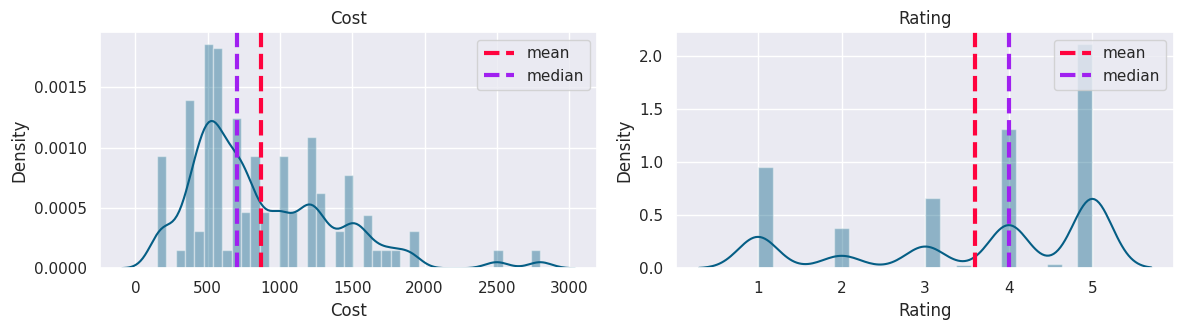

In [331]:
# Chart - 1 visualization code
plt.figure(figsize = (12,6));
for i,col in enumerate(['Cost','Rating']) :
 
    plt.subplot(2,2,i+1);
    sns.distplot(zomato_df[col], color = '#055E85');
    feature = zomato_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();

####1. Why did you pick the specific chart?  
Distplot is helpful in understanding the distribution of the feature.



####2. What is/are the insight(s) found from the chart?   
All three are show skewness.
Maximum restaurant show price range for 500.
In 2018 number of reviews are more.


####3. Will the gained insights help creating a positive business impact?  
Price always place important role in any business alongwith rating which show how much engagement are made for the product.  
But in this chart it is unable to figure any impact on business when plotted all alone.

###Chart - 2 Pie Plot on Ratings & Cuisine Count Features (Univariate)

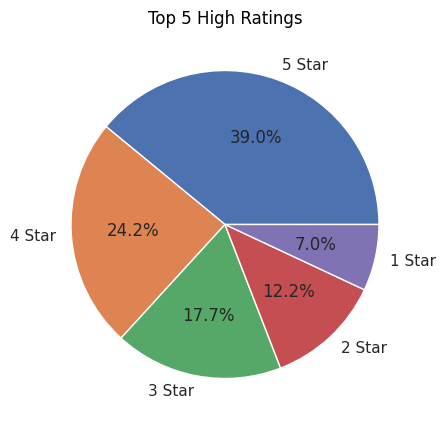

In [332]:
#plotting pie plot on Restrorant Ratings
plt.figure(figsize=(12,5))
x_label = reviews_df['Rating'].value_counts().index
y_label = reviews_df['Rating'].value_counts().values
palette_color = sns.color_palette('rocket_r')
keys = [ '5 Star', '4 Star', '3 Star', '2 Star', '1 Star']
plt.pie(x = y_label[:5], labels = keys, autopct='%1.1f%%')
plt.title('Top 5 High Ratings', color= 'black')
plt.show()

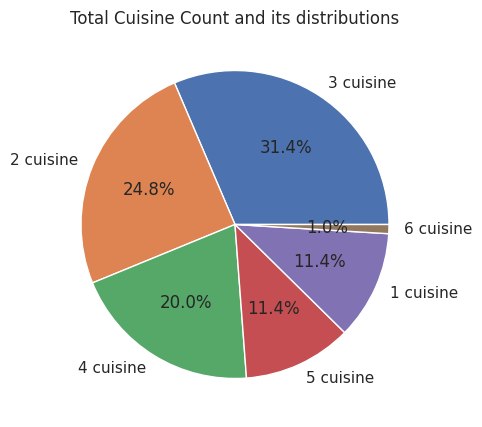

In [333]:
# Pie Plot of Total cuisine count & its distribution
cuisine_count = restro_df['cuisine_count'].value_counts().values
plt.figure(figsize=(8,5))
keys = ['3 cuisine', '2 cuisine', '4 cuisine', '5 cuisine', '1 cuisine', '6 cuisine']
plt.pie(x = cuisine_count, labels = keys, autopct='%1.1f%%')
plt.title('Total Cuisine Count and its distributions')
plt.show()

####1. Why did you pick the specific chart?  
The main purpose of using pie chart is to indicates a part-to-whole relationship in our data. The portions of the graph are proportional to the fraction of the total in each and every category. The complete "pie" represents a hundred proportion of a whole, while at the same time, the pie "slices" signify portions of the whole. It shows the total coverages covered by room types, neighbourhood group & neighbourhood.



####2. the insights found from the chart?  

*   From graph 1 it ia clear that most of the restaurant has 4 and 5 star of the rating which distribution is of 39% and 24.2%.
* Restaurant with 1 star is only 7% rating.
* From the graph 2, we can say that restaurants with 3 and 2 types of different cuisines has more number i.e. 32.1% and 24.1% distribution.
* While restaurant with 6 cuisine type has less number with 1% only.


####3. Will the gained insights help creating a positive business impact?   

Yes. We found that less number of different types of available cuisines may affect the restaurant's image as customers looks firstly about the different type of food as per their preference.

###Chart - 3 High and Low rated restaurants

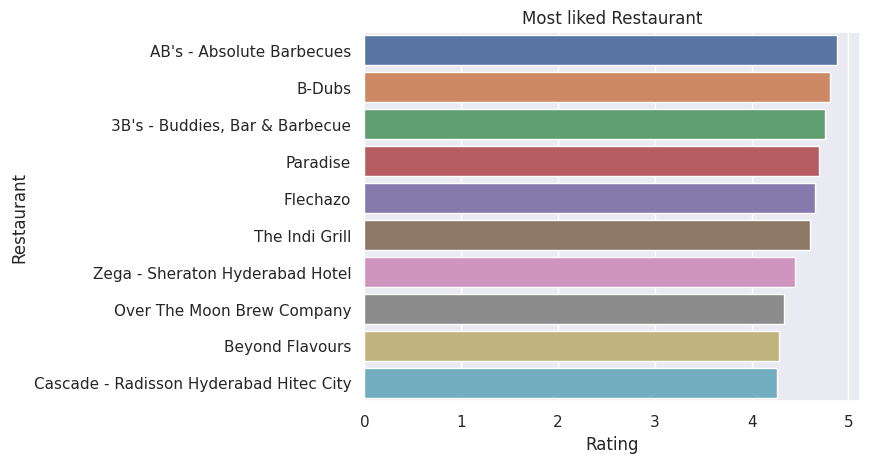

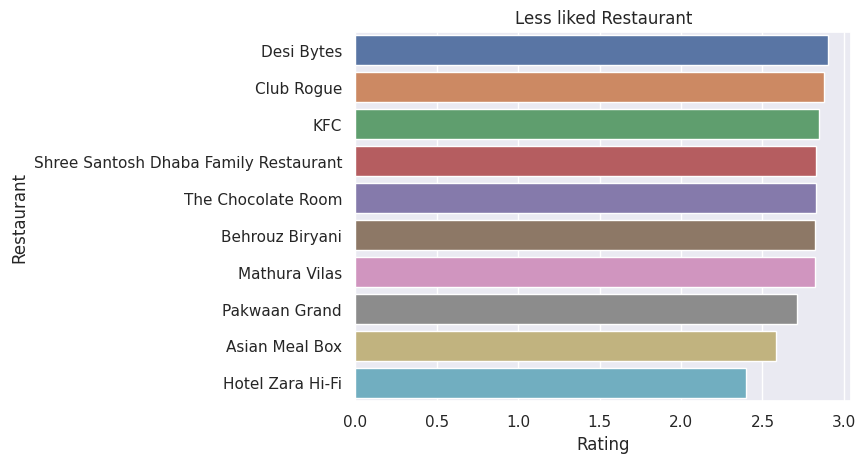

In [334]:
ratings_and_prices = zomato_df.groupby('Restaurant').agg({'Rating':'mean', 'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Cosing'})
ratings_df = ratings_and_prices.sort_values('Rating', ascending = False)
# plt.rcParams['figure.figsize']= (6,4)

# visualization code for most liked
sns.barplot(data = ratings_df[:10], x = 'Rating', y = 'Restaurant')
plt.title('Most liked Restaurant')
plt.show()

#chart for less liked hotels
sns.barplot(data = ratings_df[-10:], x = 'Rating', y = 'Restaurant')
plt.title('Less liked Restaurant')
plt.show()

####1. Why did you pick the specific chart?
  I picked barplot for the above graph because it show frequency level for different category.


2.The insights found from the chart?   
AB's - Absolute Barbecues, show maximum engagement and retention as it has maximum number of rating on average and Hotel Zara Hi-Fi show lowest engagement as has lowest average rating.


####3. Will the gained insights help creating a positive business impact?

Engagement and retention for any business is very much important as profit and scalability for any business depend upon retention of customers. Maximum retention means people prefer to use the same brand over others.

Some restaurant show less rating which can show negative growth if not monitored why they recieve less order for example KFC is listed in low rated it is sure they have different outlet and their own outsourcing and lised here because of the popularity of the app and to increase their sale and demand but are not giving 100% dedication to the platform to generate revenue.

###Chart - 4 Cosing for High Rated and Low Rated Hotels

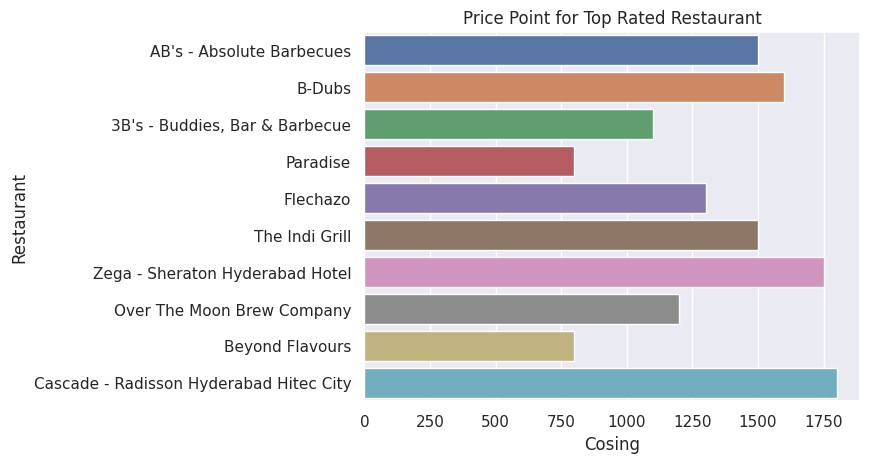

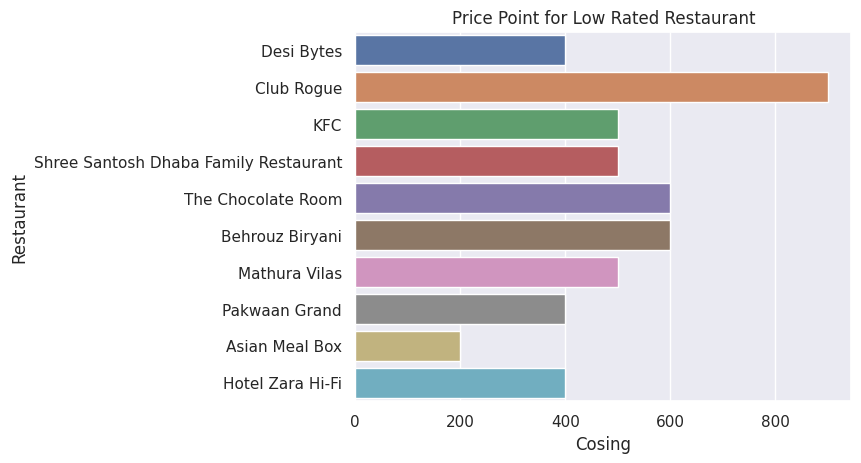

In [335]:
# Chart - 3 visualization code for prices of high rated restaurant
sns.barplot(data = ratings_df[:10], x = 'Cosing', y = 'Restaurant')
plt.title('Price Point for Top Rated Restaurant')
plt.show()


#visualization code for prices of low rated restaurant
sns.barplot(data = ratings_df[-10:], x = 'Cosing', y = 'Restaurant')
plt.title('Price Point for Low Rated Restaurant')
plt.show()

####1. Why did you pick the specific chart?
Here I choose barplot because bar plot is a good choice for plotting hotel name and price point as it is a simple and effective way to display the comparison of different categories (hotel names) and their corresponding values (price points) on the same chart. Also, it allow to have a sense of the price range of each hotel and how they compare to each other.



####2. The insights found from the chart?
Price point for high rated hotel AB's= Absolute Barbecues is 1500 and price point for low rated restaurant Hotel Zara Hi-Fi is 400.



####3. Will the gained insights help creating a positive business impact?


Since it is customer centered business i.e., direct to consumer it is important to understand price point which makes this business more affordable for evryone, therefore it is important for business to crack the price point.

Here most liked restaurant has a price point of 1500 which is even though a little high than average but as this business is all about food quality and taste it show maximum engagement which means it serve best quality of food, however deep dive on analysing review text can exactly give why this price point is prefered most.

Some restaurant with lowest rating even with low price point is not making engagement, this may create a negative impact on business.



###Chart - 5 - Popular Cuisines

In [336]:
# For loops to extract every single Cuisine name.
cuisine_list = restro_df.Cuisines.str.split(', ') 
cuisine_ = []
for names in cuisine_list:
  for name in names:
    cuisine_.append(name)
cuisine_series = pd.Series(cuisine_)    

In [337]:
# Creating DataFrame of Cuisines and their Counts.
cuisines = cuisine_series.to_frame(name='Cuisines')
cuisines= cuisines.value_counts().reset_index()
cuisines.rename(columns={0: 'Count'}, inplace=True)
cuisines.head()

,Cuisines,Count
0,North Indian,61
1,Chinese,43
2,Continental,21
3,Biryani,16
4,Asian,15


Text(0.5, 1.0, 'Cuisines at Restaurants in Hyderabad (in order of Popularity)')

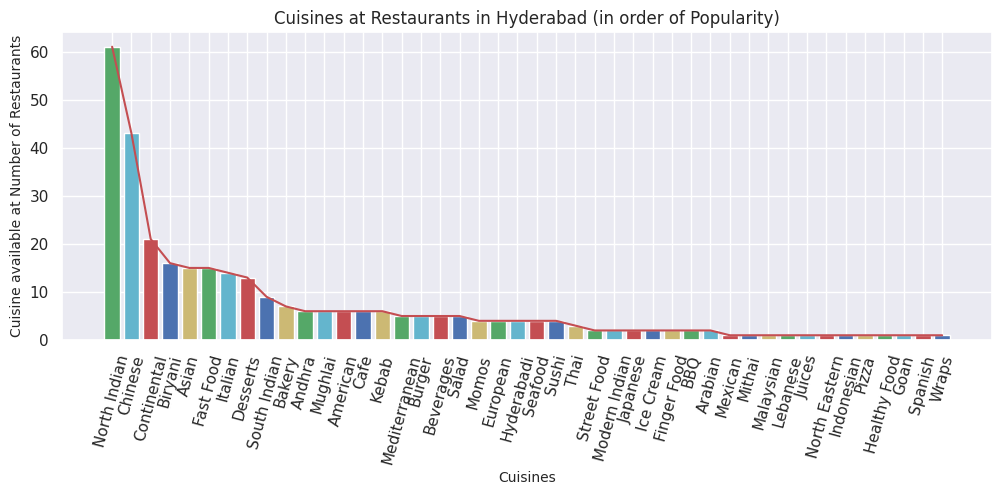

In [338]:
plt.figure(figsize=(12,4)) #setting size

plt.plot(cuisines.index,cuisines['Count'],color='r') #plottig line 
plt.bar(cuisines['Cuisines'],cuisines['Count'],color=['g','c','r','b','y']) # plotting bar graph
plt.xlabel('Cuisines',size=10)
plt.xticks(rotation=75)
plt.ylabel('Cuisine available at Number of Restaurants',size=10)
plt.title('Cuisines at Restaurants in Hyderabad (in order of Popularity)',size=12)

####1. Why did you pick the specific chart?   
Bar graph helps us to clearly visualize highest 'n', lowest 'n' etc.



####2. What is/are the insight(s) found from the chart?
Despite South indian location, North Indian, Chinese are the two most popular cuisines in Hydrabad and presented in 40+ restaurants, The Famous Hyderabadi Biriyani is attributed as a cuisine in Itself and holds the 4th position, and Healthy food, Lebanese, Malaysian are the least popular in hydrabad as presenmted in only 1 or 2 restaurants, hydrabad has less demand for healthy food etc.



####3. Will the gained insights help creating a positive business impact?
Getting knowledge about the popular cuisines in the city helps restaurants to make better decisions about foods that are popular and that are high demanding, here we see a supply side view of the cuisines, there may be some hidden information presented abound demand by consumers that can be unvealed through further analysis.

###Chart - 6 Line Plot on Bivariate Data (Bivariate Analysis)

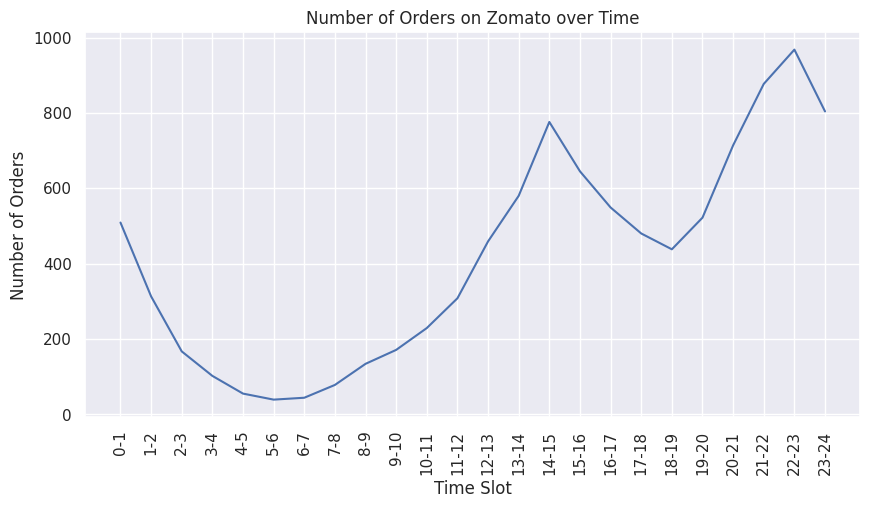

In [339]:
# GRAPH - 1
# create a dictionary to store the data
data = {'Time Slot': ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24'],
        'Number of Orders': [509, 313, 167, 102, 55, 39, 44, 78, 134, 171, 229, 308, 459, 580, 776, 645, 549, 480, 438, 522, 714, 877, 968, 804]}
df = pd.DataFrame(data)

# create a line plot using seaborn
plt.figure(figsize=(10,5))
sns.lineplot(x='Time Slot', y='Number of Orders', data=df)
plt.title('Number of Orders on Zomato over Time')
plt.xticks(rotation=90)
plt.show()

In [340]:
# Total count of ratings from 1 star to 5 star
ratings_df = reviews_df['Rating'].value_counts().reset_index()
ratings_df.rename(columns={'index': 'Ratings'}, inplace=True)
ratings_df.rename(columns={'Rating': 'Count'}, inplace=True)
ratings_df

,Ratings,Count
0,5.0,3832
1,4.0,2373
2,1.0,1735
3,3.0,1193
4,2.0,684
5,4.5,69
6,3.5,47
7,2.5,19
8,1.5,9


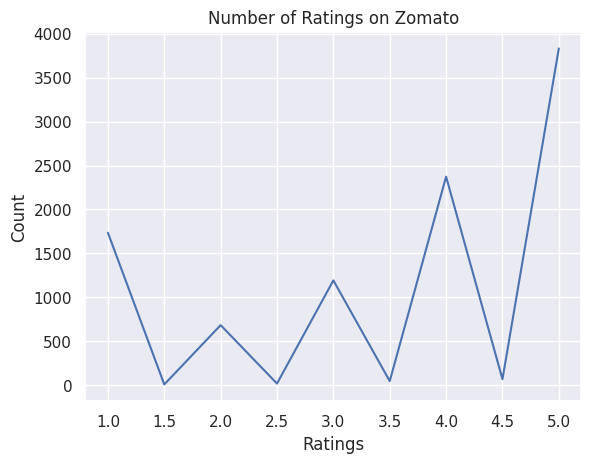

In [341]:
# create a line plot on ratings
sns.lineplot(x='Ratings', y='Count', data= ratings_df)
plt.title('Number of Ratings on Zomato')
plt.show()

####1. Why did you pick the specific chart?
A line plot is a type of graph that displays data using a number of connected points or markers, connected by straight lines. It is commonly used to visualize relationships between two different variables. Line plots are useful for assessing trends and patterns in data and can be used to compare multiple sets of data.





####2.The insighs found from the chart?

From graph 1, we can infer that most of the people orders food between 3PM to 4PM and 10PM to 11PM. Least number of order is between 3AM to 7AM may be because of very early morning timing.   
From graph 2, we can see that 5 star rating has more number of count than 4 star. Ratings from 4.5 star to 1.5 star has least and similar number of count.


####3. Will the gained insights help creating a positive business impact?

Yes. We can see the peak hours for order on zomato app. From this perspective, we can suggest zomato to throw more offer at this timings so that zomato can increse their order number and their cutomers.

###Chart - 7 - Cost vs Rating

Text(0.5, 1.0, 'Relation between Rating & Cost of Restaurant')

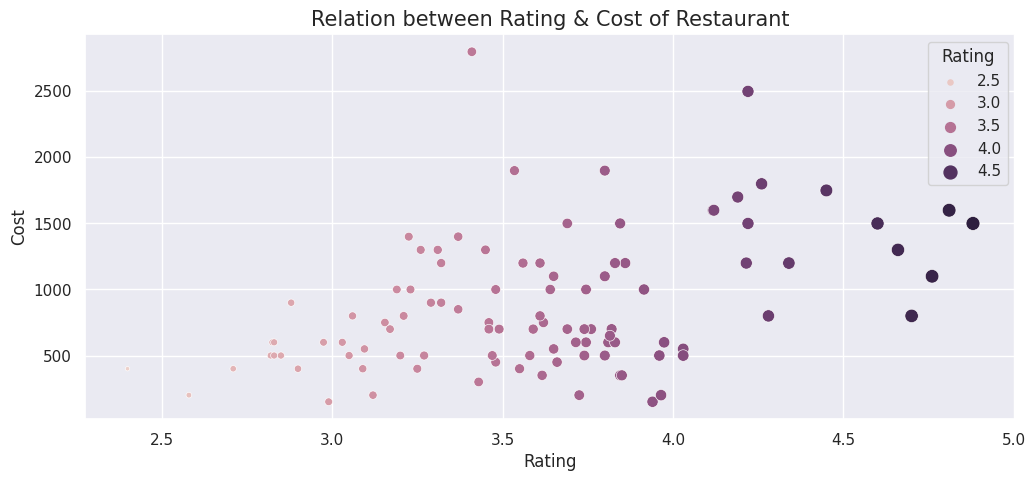

In [342]:
plt.figure(figsize=(12,5)) # setting size
merge_grupby = zomato_df.groupby('Restaurant').agg({'Cost':'mean', 'Rating':'mean'}).reset_index()
# plotting scatter plt shwoing relation between 2 features
sns.scatterplot(data=merge_grupby, x='Rating',  y='Cost', size='Rating', sizes=(10, 100), hue="Rating")

plt.title('Relation between Rating & Cost of Restaurant', size=15)

####1. Why did you pick the specific chart?
Scatterplot is best to use when we need to define Dependence or independence of 2 variables or need to know any relationship between variables.



####2. What is/are the insight(s) found from the chart?
In this data less than 3.0 ratings are only for low cost restaurants and higher ratings are only for restaurants costs more than 800, this looks like a relation between cost and ratings.



####3. Will the gained insights help creating a positive business impact?

It looks like hydrabad's restaurants is sensitive to their price, as we see a pattern of low rating in low cost restaurants, there can be quality issues with the low cost restaurants moreover we have only a sample of restaurants, however given the rich nature of city, it looks logicaly correct, so this report helps restaurants to wiork on their price points and make more strategic decision.

###Chart - 8 - Correlation Heatmap (Multivariate)

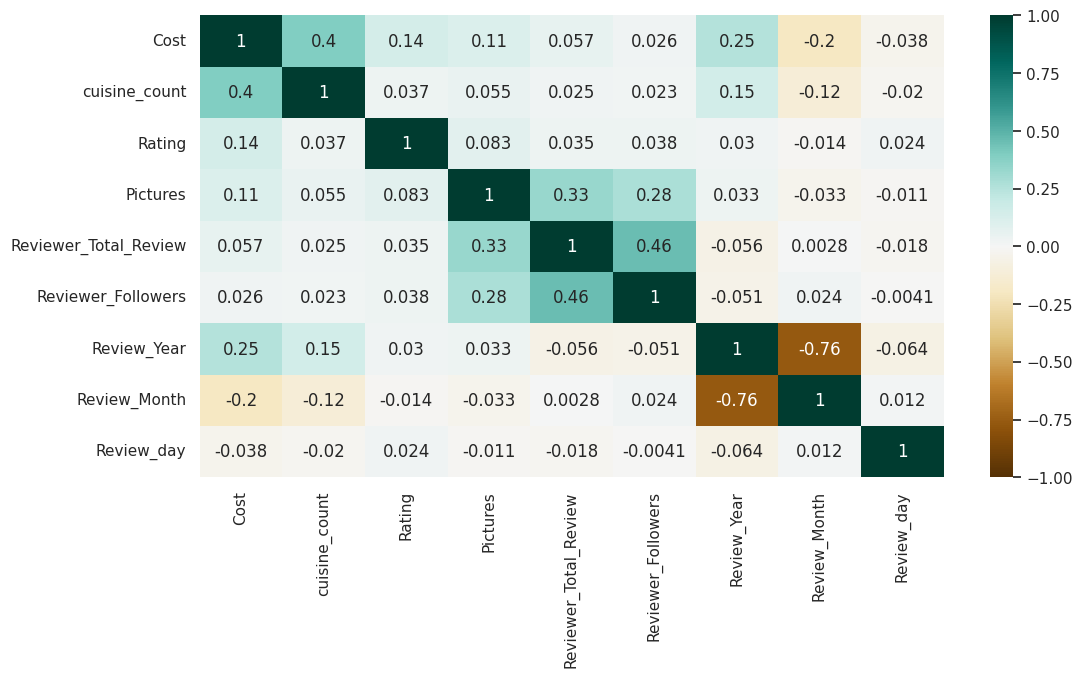

In [343]:
# Correlation Heatmap visualization code
correlation = zomato_df.corr()
plt.figure(figsize = (12,6))
sns.heatmap(correlation, cmap = 'BrBG', annot = True, vmin = -1, vmax=1)
plt.show()

####1. Why did you pick the specific chart?  
A correlation matrix is a table type graph which indicates the results of correlation coefficients tests between variables at a time. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The fluctuation of correlation is lies between -1 to 1.



####2. The insights found from the chart?

There are 46% of positive correlation b/w Review_count and Followers.
There are positive correlation between Cuisine_count and cost i.e. the restaurant with more number of cuisine has higher cost as compared to the restauranr with less number of cuisine.
There are also 33% of positive correlation b/w review_count and pictures.
we conclude that there is no strong correlation between any variables

## **6. Feature Engineering & Data Pre-processing**

### 1. Handling Missing Values

In [344]:
#sum of null values in all variables from restaurant dataset
restro_df.isna().sum()

Restaurant        0
Links             0
Cost              0
Collections      54
Cuisines          0
Timings           1
cuisine_count     0
dtype: int64

In [345]:
#filling null value in timings column
restro_df['Timings'].fillna(restro_df.Timings.mode()[0], inplace = True)

In [346]:
#checking null values in Collections
missing_percentage = ((restro_df['Collections'].isnull().sum())/(len(restro_df['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')

Percentage of missing value in Collections is 51.43%


In [347]:
#dropping collection column since has more than 50% of null values
restro_df.drop('Collections', axis = 1, inplace = True)
restro_df.drop('cuisine_count', axis = 1, inplace = True)

In [348]:
#final checking of missing value
restro_df.isnull().sum()

Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
dtype: int64

In [349]:
##sum of null values in all variables from reviews dataset
reviews_df.isnull().sum()

Restaurant                  0
Reviewer                    2
Review                      9
Rating                      2
Metadata                    2
Time                        2
Pictures                    0
Reviewer_Total_Review       2
Reviewer_Followers       1580
Review_Year                 2
Review_Month                2
Review_day                  2
dtype: int64

In [350]:
# dropping null values in reviewer and Reviewer_Total_Review column as all values are null for those column
reviews_df = reviews_df.dropna(subset=['Reviewer','Reviewer_Total_Review'])

In [351]:
#filling null values in review and reviewer follower column
reviews_df = reviews_df.fillna({"Review": "No Review", "Reviewer_Followers": 0})

In [352]:
# final checking null values
reviews_df.isnull().sum()

Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Reviewer_Total_Review    0
Reviewer_Followers       0
Review_Year              0
Review_Month             0
Review_day               0
dtype: int64

In [353]:
#merging both dataset
zomato_df = restro_df.merge(reviews_df, on = 'Restaurant')
zomato_df.shape

(9961, 16)

#### What all missing value imputation techniques have you used and why did you use those techniques?

I started treating missing values by first removing the duplicate data where all other values were NaN or null values except had restaurant name, so instead of replacing each null value I removed it as it was only 36 duplicate data which had no unique identity.

Dataset that contains details about hotel, had 1 null value in timing feature and more than 50% null value in collection feature. In order to treat with those I first replaced the null value for timing with mode since there was only one null and mode is robust to outliers plus that hotel name was one unique feature which had all other feature except timing and collection so it was better to preserve that data. Since there was more than 50% null values in collection feature, I removed the entire column because columns with a high percentage of null values are likely to have a lot of missing data, which can make it difficult to accurately analyze or make predictions based on the data.

In the dataset tha has details of reviewer had Reviewer - 2, Review - 9, Rating - 2, Metadata - 2, Time - 2, Reviewer_Total_Review- 3, Reviewer_Followers - 1581, Review_Year - 2, Review_Month - 2, Review_Hour - 2. On analysing I found that feature like reviewer and reviewer total review had all null values, therefore I removed those two columns which made null values in other feature to zero except in review and reviewer followers columns. Since review was textual data, I changed those 7 null values to 'no review' and reviewer followers to 0 as follower is the meta data for reviewer and it can be 0.

And thus all the null values were treated, at the end I then again merged both the dataset hotel and review dataset.

### 2. Handling Outliers

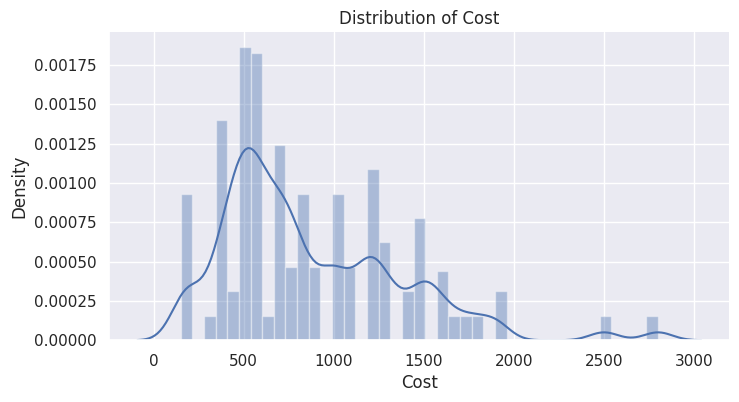

In [354]:
#distribution of cost
plt.figure(figsize=(8,4))
sns.distplot(zomato_df['Cost'])
plt.title("Distribution of Cost")
sns.despine()

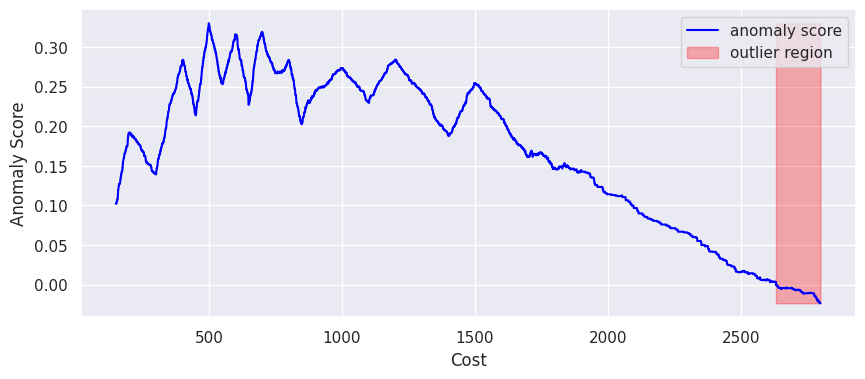

In [355]:
from sklearn.ensemble import IsolationForest
# Load your DataFrame and select the column with the cost data
cost_col =zomato_df["Cost"].values.reshape(-1, 1)

# Create isolation forest object and fit to data
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(cost_col)

# Predict anomalies in data
# df['anomaly'] = isolation_forest.predict(cost_col)

# Visualize anomalies as shaded region
xx = np.linspace(cost_col.min(), cost_col.max(), len(cost_col)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10, 4)) # setting the size
plt.plot(xx, anomaly_score, label='anomaly score', color='blue')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='red', alpha=0.3, label='outlier region')

plt.legend()
plt.xlabel('Cost')
plt.ylabel('Anomaly Score')
plt.show()

In [356]:
# Handling Outliers & Outlier treatments

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = zomato_df['Cost'].quantile(0.25)
Q3 = zomato_df['Cost'].quantile(0.75)

# Calculate the IQR value
iqr = Q3 - Q1

# Capping the Cost using IQR technique
# Calculate the lower limit and upper limit
lower_limit = Q1 - (1.5 * iqr)
upper_limit = Q3 + (1.5 * iqr)

# Replace any values below the lower bound with the lower bound
zomato_df.loc[zomato_df['Cost'] < lower_limit, 'Cost'] = lower_limit

# Replace any values above the upper bound with the upper bound
zomato_df.loc[zomato_df['Cost'] > upper_limit, 'Cost'] = upper_limit

##### What all outlier treatment techniques have you used and why did you use those techniques?

There are various neumerical columns in our data but we only require 'Cost' as its the only neumerical feature that is required for clusters of restaurnats.

At first, we have used Isolation forest algorithm from scikit learn library of to identify anomalies or outliers in our 'Cost' feature, since that outliers are in skewed distribution, we used the IQR technique to cap the outliers with lower and upper bounds using the formula.

In [357]:
# Encode your categorical columns

#categorial encoding using pd.getdummies
#new df with important categories
cluster_dummy = restro_df[['Restaurant','Cuisines']]
#spliting cuisines as they are separted with comma and converting into list
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')
#using explode converting list to unique individual items
cluster_dummy = cluster_dummy.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())
#using get dummies to get dummies for cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])

#checking if the values are correct
# cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].eq(1)[:5].T
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]

#replacing cuisines_ from columns name - for better understanding run seperatly

# cluster_dummy.columns = cluster_dummy.columns.str.replace(" ","")
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")
# cluster_dummy = cluster_dummy.groupby(cluster_dummy.columns, axis=1).sum()

#grouping each restaurant as explode created unnecessary rows
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()

In [358]:
#total cuisine count 
restro_df['Total_Cuisine_Count'] = zomato_df['Cuisines'].apply(lambda x : len(x.split(',')))

In [359]:
#Average engagement of restaurants
avg_hotel_rating = reviews_df.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating

,Restaurant,Rating,Total_Review
0,10 Downing Street,3.80,100
1,13 Dhaba,3.48,100
2,"3B's - Buddies, Bar & Barbecue",4.76,100
3,AB's - Absolute Barbecues,4.88,100
4,Absolute Sizzlers,3.62,100
...,...,...,...
95,Urban Asia - Kitchen & Bar,3.65,100
96,Yum Yum Tree - The Arabian Food Court,3.56,100
97,Zega - Sheraton Hyderabad Hotel,4.45,100
98,Zing's Northeast Kitchen,3.65,100


In [360]:
#adding average rating - will remove 5 unrated restaurant from 105 restaurant
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
restro_df = restro_df.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')

In [361]:
#adding cost column to the new dataset 
cluster_dummy = restro_df[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count'
                      ]].merge(cluster_dummy, on = 'Restaurant')

In [362]:
#creating data frame for categorial encoding
cluster_df = restro_df[['Restaurant','Cuisines','Cost','Average_Rating','Total_Cuisine_Count']]
#creating new dataframe for clustering 
cluster_df = pd.concat([cluster_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [363]:

#creating categorial feature for cuisine
#iterate over every row in the dataframe
for i, row in cluster_df.iterrows():
  # iterate over the new columns 
  for column in list(cluster_df.columns):
      if column not in ['Restaurant','Cost','Cuisines','Average_Rating','Total_Cuisine_Count']:
        # checking if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #assign it as 1 else 0
          cluster_df.loc[i,column] = 1
        else:
          cluster_df.loc[i,column] = 0

In [364]:
cluster_dummy.shape

(100, 48)

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [365]:
#creating new df for text processing of sentiment analysis
sentiment_df = reviews_df[['Reviewer','Restaurant','Rating','Review']]
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

In [366]:
#analysing two random sample
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
5300,5300,Amith Katta,Diners Pavilion,5.0,A classy restaurant in Gachibowli area that se...
9918,9918,Deb,Chinese Pavilion,3.5,Lust for authentic Chinese food takes me to th...


In [367]:
# Expand Contraction
import contractions
# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

#### 2. Lower Casing

In [368]:
# Lower Casing of Reviews 
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

####3. Removing Punctuations

In [369]:
# Remove Punctuations
import string

# create a translator for removing punctuation
translator = str.maketrans('', '', string.punctuation)

# remove punctuation
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x: x.translate(translator))

####4. Removing URLs & Removing words and digits contain digits.

In [370]:
# Remove URLs & Remove words and digits contain digits
import re

# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

In [371]:
#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
restro_df['Location'] = restro_df['Links'].apply(get_location)

####5. Removing Stopwords & Removing White spaces

In [372]:
# Remove Stopwords
# extracting the stopwords from nltk library
stop_words = stopwords.words('english')

In [373]:
#function to remove stopwords
def delete_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in stop_words]
  # joining the list of words with space separator
  return " ".join(text)

In [374]:
#calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

####6. Rephrase Text

Not Required

We are not using Rephrase text as this will not be much required in this reviews data that needs to be originalfor the best results from our analysis.

####7. Tokenization

In [375]:
# Apply Tokenization on review data
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
1217,1217,Jay Dixit,Absolute Sizzlers,5.0,"[super, sizzlers, decent, staff, offers, enoug..."
2411,2411,DNiharikaa,SKYHY,4.0,"[one, good, open, terase, place, town, food, g..."


####8. Text Normalization

In [376]:
#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

#####Which text normalization technique have you used and why?
In these portion I've two options Stemmig and Lemmatization, Lemmatization is a specific type of text normalization that involves reducing words to their base or root form, known as a lemma. This can help to standardize variations of the same word, such as "walking," "walked," and "walks" all being reduced to "walk."

Lemmatization can be particularly useful for reviews analysis of Zomato because it can improve the accuracy of sentiment analysis and other text analysis techniques. By standardizing words to their base form, lemmatization can help to identify and group together related words, even if they are in different forms, and provide a more comprehensive understanding of the language used in the reviews.

####9. Part of speech tagging

**Not Required**

POS tagging may not be as useful because reviews tend to use simpler language and there may be less variation in the types of words used compared to other types of text data, such as news articles or academic papers.

Additionally, reviews often contain informal language and colloquialisms, which can make POS tagging more challenging and less reliable. For example, reviews may contain slang or idiomatic expressions that are not easily classified by a POS tagger.

####10. Text Vectorization

In [377]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

#####Which text vectorization technique have you used and why?
I have used TF-IDF vectorizer in this case, because TF-IDF is a popular choice for text vectorization is that it can effectively represent the importance of each word in a text document, allowing for more accurate analysis and modeling. This is particularly useful for applications such as sentiment analysis, topic modeling, and information retrieval.

###4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [378]:
restro_df.shape

(100, 8)

In [379]:
#columns for dataset
restro_df.columns

Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings',
       'Total_Cuisine_Count', 'Average_Rating', 'Location'],
      dtype='object')

Dropping column like link as from link location was extracted, dropping location as it does not have variability only had hyderabad as 99% values. Then dropping Cuisines column as cuisine from the feature are extracted as new feature.

In [380]:
#dropping columns
hotel = restro_df.drop(columns = ['Links','Location'], axis = 1)

In [381]:
#creating new binary feature called sentiment based on rating which has 1 = positive and 0 = negative
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(
    lambda x: 1 if x >=sentiment_df['Rating'].mean() else 0)  #1 = positive # 0 = negative

####2. Feature Selection

In [382]:
#feature selected for sentiment analysis
sentiment_df.columns

Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review', 'Sentiment'], dtype='object')

#####What all feature selection methods have you used and why?
We are going to use Principal Component Analysis (PCA) for feature selection, in the Clustering problems we have to deal with dimensionalty problem with features.

#####Which all features you found important and why?
for the Restaurant Clustering, we find that 'Cuisines', 'Cost', 'Rating' as important feature to perform clustering. and for the Topic modeling from Reviews data, we have selected reviews text data and converted that to tfidf vectors.

In [384]:
#using log transformation to transform Cost as using capping tends to change median and mean
cluster_df['Cost'] = np.log1p(cluster_df['Cost'])
cluster_dummy['Cost'] = np.log1p(cluster_dummy['Cost'])

Transforming features, such as log transforming right-skewed data, is done to improve the performance and interpretability of machine learning models, particularly when dealing with skewed or non-normal data. moreover other numerical features does follow symmetric distribution of data.

####6. Data Scaling

In [388]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Select the numerical variables to standardize
numerical_vars = ['Cost','Total_Cuisine_Count','Average_Rating']

# Standardize the numerical variables using StandardScaler
scaler = StandardScaler()
scaled_df = cluster_dummy.copy()
scaled_df[numerical_vars] = scaler.fit_transform(cluster_dummy[numerical_vars])

####Which method have you used to scale you data and why?

I've used Standard Scaler, these variables have different scales and ranges, which can affect the results of clustering. For example, the cost of a meal can be a much larger number than the rating, and this can cause the clustering algorithm to give more weight to the cost variable in the clustering process.
By standardizing the numerical variables, we put them on the same scale and range, which ensures that each variable contributes equally to the clustering process. This makes the clustering results more reliable and interpretable.

standardizing the numerical variables can help to improve the performance of certain clustering algorithms, such as K-means, which uses Euclidean distance as a similarity metric.

###7. Dimesionality Reduction

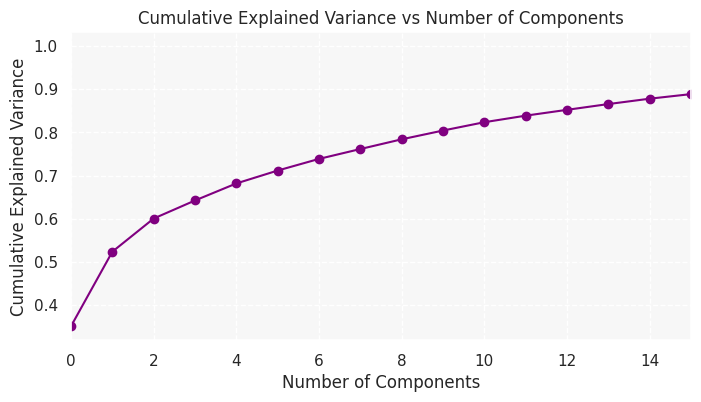

In [395]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
pca = PCA()

# Fit the PCA object to your standardized data
pca.fit(scaled_df)

# Get explained variance ratio of each principal component
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# visualising the cummulative variance
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(cumulative_var, marker='o', color='purple')
ax.set_xlabel("Number of Components")
ax.set_ylabel("Cumulative Explained Variance")
ax.set_title("Cumulative Explained Variance vs Number of Components")
plt.xlim([0, 15])

# Add background color and style
ax.set_facecolor('#f7f7f7')
ax.grid(color='white', linestyle='--', linewidth=1)

plt.show()

In [399]:
#using n_component as 3 
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(scaled_df)

# transform data to principal component space
pca_df = pca.transform(scaled_df)

# variance explained by three components
print(f'Cumulative variance explained by 3 principal components: {np.sum(pca.explained_variance_ratio_)}')

Cumulative variance explained by 3 principal components: 0.6004355768869261


#####Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)
We used Principal Component Analysis technique. PCA is a commonly used unsupervised technique for reducing the dimensionality of high-dimensional datasets while retaining most of the variation present in the original data.

PCA is a suitable technique in this case because you have more than 40 features, and using all of them for clustering may result in a high-dimensional space that can make it challenging to visualize and analyze the data. PCA reduces the dimensionality of the data by transforming the original features into a new set of orthogonal features that represent the most important patterns in the data. These new features, called principal components, are ordered by the amount of variance they explain in the original data.

####8. Data Splitting

Not Required

The train-test split is a technique for evaluating the performance of a machine learning algorithm. primary used for classification or regression problems and can be used for any supervised learning algorithm. Since This is an Unsuopervised ML problem and we dont require an a validation data, we are not going to use this.

## ***7. ML Model Implementation***

###ML Model - 1 KMeans Clustering


In [401]:
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans

In [402]:
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(pca_df)
    wcss.append(km.inertia_)

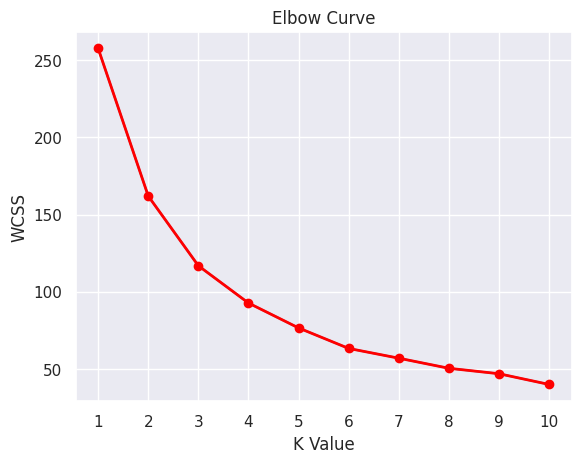

In [405]:
#elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.title('Elbow Curve')
plt.show()

In [ ]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
import matplotlib.cm as cm

# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_df)
# silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
         # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_df[:, 0], pca_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker='' % i will give numer in cluster in 2 plot
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')


In [ ]:
# Silhoutte score visualization
import matplotlib.cm as cm

# Giving range from 7 to 19
range_n_clusters = range(2,11)
best_score = -1

# visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_df)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_df[:, 0], pca_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker= i will give numer in cluster in 2 plot
    for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters =", n_clusters),
                 fontsize=14, fontweight='bold')

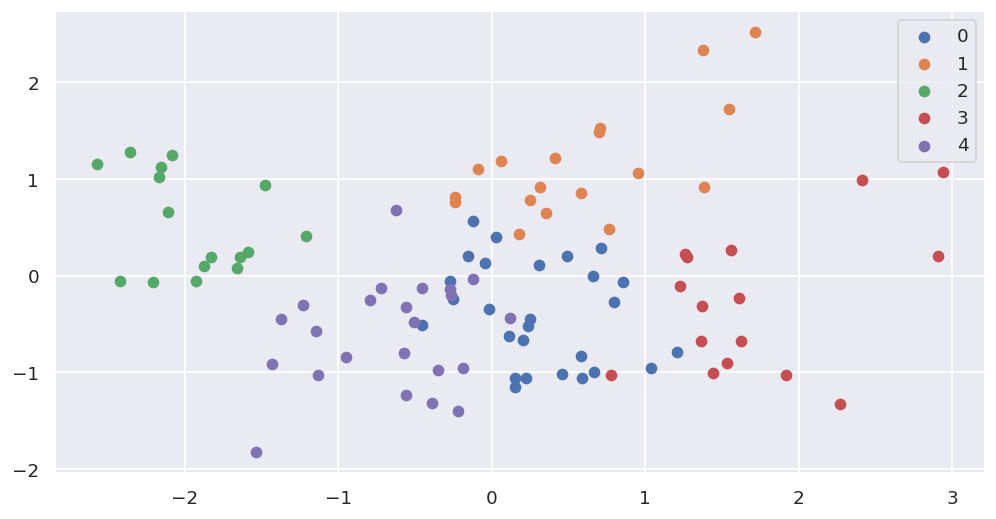

In [412]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,5), dpi = 120)

kmeans= KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
kmeans.fit(pca_df)

#predict the labels of clusters.
label = kmeans.fit_predict(pca_df)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(pca_df[label == i , 0] , pca_df[label == i , 1] , label = i)
plt.legend()
plt.show()  

In [415]:
#making df for pca
kmeans_pca_df = pd.DataFrame(pca_df,columns=['PC1','PC2','PC3'],index=scaled_df.index)
kmeans_pca_df["label"] = label
kmeans_pca_df.sample(2)

,PC1,PC2,PC3,label
Restaurant,,,,
B-Dubs,-2.358105,1.276479,-0.089602,2
The Lal Street - Bar Exchange,-0.570273,-0.802525,-0.458207,4


In [416]:
#joining the cluster labels to names dataframe
cluster_dummy.set_index(['Restaurant'],inplace=True)
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.sample(2)

,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
GD's,1.976385,3.96,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Shree Santosh Dhaba Family Restaurant,1.976385,2.83,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


### ML Model - 2 Agglomerative Hierarchical Clustering

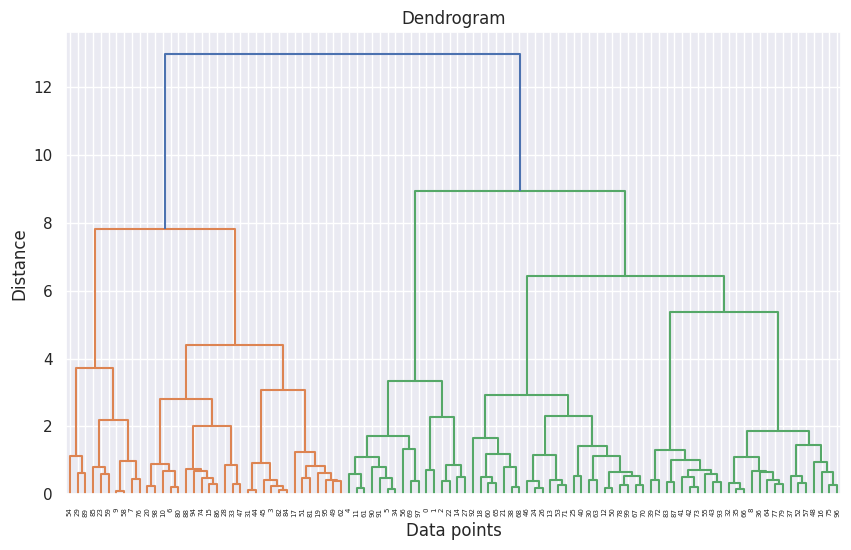

In [418]:
# ML Model - 3 Implementation
from scipy.cluster.hierarchy import linkage, dendrogram

# calculate the linkage matrix
Z = linkage(pca_df, method='ward', metric='euclidean')

# plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()  

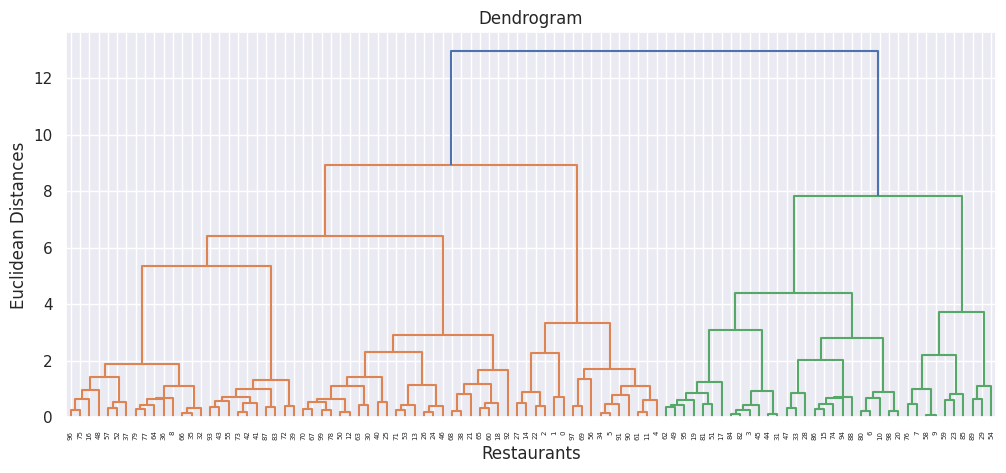

In [420]:
#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(pca_df, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()

In [424]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(pca_df)
    score = silhouette_score(pca_df, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2754469014222998
For n_clusters = 3, silhouette score is 0.24717814117344517
For n_clusters = 4, silhouette score is 0.2663733761677256
For n_clusters = 5, silhouette score is 0.2801174569623556
For n_clusters = 6, silhouette score is 0.2949494221502221
For n_clusters = 7, silhouette score is 0.3162840115824437
For n_clusters = 8, silhouette score is 0.3369027055181397
For n_clusters = 9, silhouette score is 0.3237053996259962
For n_clusters = 10, silhouette score is 0.3051900023962674
For n_clusters = 11, silhouette score is 0.307115863634242
For n_clusters = 12, silhouette score is 0.31380958285429084
For n_clusters = 13, silhouette score is 0.3214595563480846
For n_clusters = 14, silhouette score is 0.32938926317623163
For n_clusters = 15, silhouette score is 0.33037140682712496


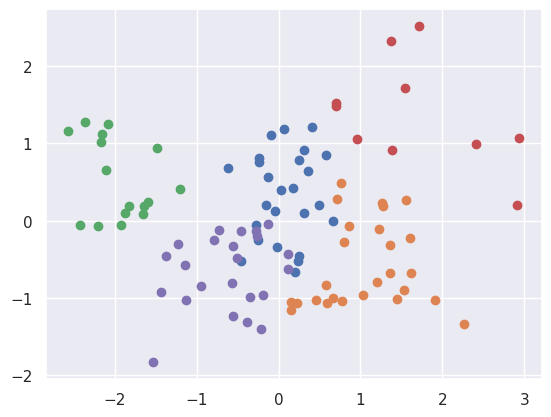

Silhouette Coefficient: 0.280
davies_bouldin_score 1.140


In [425]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification

# define the model
model = AgglomerativeClustering(n_clusters = 5)      #n_clusters=5
# fit model and predict clusters
y_hc = model.fit_predict(pca_df)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(pca_df[row_ix, 0], pca_df[row_ix, 1])
# show the plot
plt.show()
#Evaluation

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(pca_df,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(pca_df, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(pca_df, y_hc))
     